<a href="https://colab.research.google.com/github/obedjunias19/DL-using-Pytorch/blob/master/language_features-model_bulding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt
import random
import re

#Loading the dataset and parsing the required information from the dataset.

In [2]:
# Reading in data
prosodic_file = "https://raw.githubusercontent.com/gyanigk/ML-HW4/refs/heads/main/data/prosodic_features.csv"
scores_file = "https://raw.githubusercontent.com/gyanigk/ML-HW4/refs/heads/main/data/scores.csv"
transcript_file = "https://raw.githubusercontent.com/gyanigk/ML-HW4/refs/heads/main/data/transcripts.csv"

# Read csvs into a file
prosodic_data = pd.read_csv(prosodic_file)
scores_data = pd.read_csv(scores_file)
transcript_data = pd.read_csv(transcript_file)

# Add a column that corresponds to participant for easy splitting for prosodic data
prosodic_data['Participant'] = prosodic_data['participant&question'].str.extract(r'^(PP?\d+)')
prosodic_data['Participant'] = prosodic_data['Participant'].str.lower()
# Make the entire transcript lower case
transcript_data['transcript'] = transcript_data['transcript'].str.lower()
transcript_data.rename(columns={'pid': 'Participant'}, inplace=True)

In [3]:
prosodic_data.head()

,participant&question,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,PercentBreaks,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,Participant
0,P1Q1,51.952125,0.015331,75.232657,396.635613,127.989222,27.821528,217.628692,119.690367,0.773830,...,0.42117,0.000342,55,1.290667,0.494,27.176,138,274.562,257.247,p1
1,P1Q2,38.677312,0.015185,75.165527,397.613041,131.067490,26.452853,195.852246,124.820583,0.717333,...,0.38674,0.000444,40,1.866667,0.522,20.875,100,268.613,270.193,p1
2,P1Q3,43.593896,0.014680,71.034761,395.930688,127.739086,26.006330,189.441737,120.457848,1.068376,...,0.43099,0.000475,44,2.624000,0.505,22.229,114,283.912,203.506,p1
3,P1Q4,23.435813,0.008920,74.938673,248.733738,129.563914,19.334327,103.024640,124.473851,1.121487,...,0.46003,0.000907,24,2.933333,0.507,12.171,55,100.655,83.172,p1
4,P1Q5,13.274833,0.003432,93.949854,263.669188,130.178482,26.595483,174.934601,120.272480,1.078493,...,0.46576,0.001570,12,2.848000,0.628,7.541,32,129.591,117.119,p1


In [4]:
prosodic_data = prosodic_data[prosodic_data['avgBand3'] != '--undefined--']

In [5]:
prosodic_data['avgBand3'] = prosodic_data['avgBand3'].astype(float)

<ipython-input-5-c75a745c6373>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosodic_data['avgBand3'] = prosodic_data['avgBand3'].astype(float)


In [6]:
# Group by 'Participant' and calculate the mean for numeric columns
prosodic_grouped = prosodic_data.groupby('Participant').mean(numeric_only=True).reset_index()


In [7]:
prosodic_grouped.head()

,Participant,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,numVoiceBreaks,PercentBreaks,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3
0,p1,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,0.951904,...,86.40,0.432938,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474
1,p10,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,0.825242,...,149.40,0.411714,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450
2,p11,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,0.628611,...,120.80,0.367116,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714
3,p12,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,0.804380,...,92.20,0.397498,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378
4,p13,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,1.132642,...,96.25,0.490740,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950


In [8]:
prosodic_grouped.shape

(138, 36)

In [18]:
scores_data.head()

,Participant,Overall,Excited
0,p1,5.297316,5.043890
1,p3,4.414892,5.601586
2,p4,4.494494,4.261343
3,p5,5.457670,4.707062
4,p6,5.106512,4.648259


In [10]:
transcript_data.head()

,Participant,transcript,Question,Answer
0,p1,interviewer: so how are you doing?|interviewee...,NaN,NaN
1,p10,interviewer: so how you doing?|interviewee: g...,NaN,NaN
2,p11,interviewer: so tell me about yourself. |inte...,NaN,NaN
3,p12,interviewer: so how are you doing today?|inter...,NaN,NaN
4,p13,interviewer: how are you doing today?|intervie...,NaN,NaN


In [11]:
transcript_data.shape

(138, 4)

In [12]:
scores_data.head()

,Participant,Overall,Excited
0,p1,5.297316,5.043890
1,p3,4.414892,5.601586
2,p4,4.494494,4.261343
3,p5,5.457670,4.707062
4,p6,5.106512,4.648259


In [13]:
transcript_data.drop(columns=['Question','Answer'],inplace=True)

In [14]:
transcript_prosodic = pd.merge(transcript_data, prosodic_grouped, on='Participant')
transcript_prosodic.head()

,Participant,transcript,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,...,numVoiceBreaks,PercentBreaks,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3
0,p1,interviewer: so how are you doing?|interviewee...,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,...,86.40,0.432938,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474
1,p10,interviewer: so how you doing?|interviewee: g...,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,...,149.40,0.411714,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450
2,p11,interviewer: so tell me about yourself. |inte...,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,...,120.80,0.367116,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714
3,p12,interviewer: so how are you doing today?|inter...,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,...,92.20,0.397498,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378
4,p13,interviewer: how are you doing today?|intervie...,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,...,96.25,0.490740,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950


In [15]:
transcript_prosodic = pd.merge(transcript_prosodic, scores_data, on='Participant')

In [16]:
transcript_prosodic.head()

,Participant,transcript,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,...,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,Overall,Excited
0,p1,interviewer: so how are you doing?|interviewee...,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,...,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474,5.297316,5.043890
1,p10,interviewer: so how you doing?|interviewee: g...,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,...,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450,4.725115,4.383947
2,p11,interviewer: so tell me about yourself. |inte...,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,...,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714,5.010430,4.297760
3,p12,interviewer: so how are you doing today?|inter...,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,...,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378,5.038526,5.322526
4,p13,interviewer: how are you doing today?|intervie...,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,...,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950,4.251251,3.579510


In [19]:
transcript_prosodic.shape

(138, 39)

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Preprocessing function for transcripts
def preprocess_text(text):
    if text is None:  # Check if the text is None
        return ""  # Return an empty string if text is None
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[,]', '', text)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Tokenization
    words = text.split()
    # Removing Stop Words
    stop_words = set(stopwords.words('english'))
    stop_words.add('interviewer')
    stop_words.add('interviewee')

    words = [word for word in words if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)  # Return the processed text as a single string

In [21]:
!pip install vaderSentiment
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import torch
from transformers import BertTokenizer, BertModel

nltk.download('punkt')  # Tokenizer
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')  # POS Tagger
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon') # Vader
nltk.download('stopwords')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
transcript_prosodic['transcript'] = transcript_prosodic['transcript'].apply(preprocess_text)

In [23]:
transcript_prosodic.head()

,Participant,transcript,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,...,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,Overall,Excited
0,p1,im pretti good ok well pleas tell ok uhm look ...,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,...,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474,5.297316,5.043890
1,p10,great okay littl resurg hurrican laughter unde...,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,...,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450,4.725115,4.383947
2,p11,tell uhh junior mit uhh doubl major manag biol...,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,...,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714,5.010430,4.297760
3,p12,today good good tell ok junior mit major mecha...,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,...,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378,5.038526,5.322526
4,p13,today good good tell ok umm current junior stu...,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,...,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950,4.251251,3.579510


In [24]:
def create_folds(data, test_ratio=0.2, num_folds=5):
    """
    Split participants into a dedicated test set and create cross-validation folds for train/validation.

    Parameters:
        data (DataFrame): The dataset containing a 'Participant' column.
        test_ratio (float): The proportion of participants to set aside for the test set.
        num_folds (int): The number of folds for cross-validation.

    Returns:
        tuple:
            test_set_participants (list): Participants allocated to the test set.
            interview_folds (list): List of interview folds for cross-validation.
    """
    # Grab unique participant numbers from the data
    interviews = data['Participant'].unique()
    participants = list(set([re.sub(r'^pp?|q\d+', '', item) for item in interviews]))
    random.shuffle(participants, random.seed(42))

    # Split participants into test and train/validation groups
    test_participants = participants[:int(len(participants) * test_ratio)]
    train_val_participants = participants[int(len(participants) * test_ratio):]

    # Create cross-validation folds from train/validation participants
    participant_folds = [train_val_participants[i::num_folds] for i in range(num_folds)]

    test_set_participants = [item for num in test_participants for item in (f"p{num}", f"pp{num}")]

    # Map folds to interview IDs
    interview_folds = []
    for fold in participant_folds:
        interview_folds.append([item for num in fold for item in (f"p{num}", f"pp{num}")])

    return test_set_participants, interview_folds


In [25]:
test_set_participants, interview_folds = create_folds(transcript_prosodic, test_ratio=0.1, num_folds=5)

In [26]:
def get_data_splits(data, fold_number, test_participants, interview_folds):
    """
    Split data into training, validation, and testing sets based on a specified fold.

    Parameters:
        data (DataFrame): The complete dataset.
        fold_number (int): The fold to use for validation (0-based index).
        test_participants (list): Participants allocated to the test set.
        interview_folds (list): Cross-validation folds for training and validation.

    Returns:
        tuple: (training_set, validation_set, testing_set)
    """
    # Ensure valid fold number
    assert 0 <= fold_number < len(interview_folds), "Fold_number must be between 0 and len(folds) - 1"

    # Create the test set using the test participants
    test_set = data[data['Participant'].isin(test_participants)]

    # Create the validation set from the current fold
    val_set = data[data['Participant'].isin(interview_folds[fold_number])]

    # Create the training set from all folds except the current one
    train_set_parts = [
        item
        for i, fold in enumerate(interview_folds)
        if i != fold_number
        for item in fold
    ]
    train_set = data[data['Participant'].isin(train_set_parts)]

    return train_set, val_set, test_set


In [32]:
train_set, val_set, test_set = get_data_splits(transcript_prosodic, 2, test_set_participants, interview_folds)
print("Transcript Prosodic Data: ")
print(train_set.shape, " ", val_set.shape, " ", test_set.shape)
# train_set, val_set, test_set = get_data_splits(scores_data, 0)
# print("Scores Data: ")
# print(train_set.shape, " ", val_set.shape, " ", test_set.shape)
# # print(test_set.head())
# train_set, val_set, test_set = get_data_splits(transcript_data, 0)
# print("Transcript Data: ")
# print(train_set.shape, " ", val_set.shape, " ", test_set.shape)

Transcript Prosodic Data: 
(100, 39)   (26, 39)   (12, 39)


In [34]:
test_set.head()

,Participant,transcript,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,...,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,Overall,Excited
18,p31,today good good readi yep tell uh well junior ...,74.381196,0.016025,75.685112,386.613851,224.544818,39.097098,273.863613,220.056487,...,0.000278,56.0,3.385600,0.7976,42.1676,171.4,204.6390,205.3664,4.577678,5.329944
23,p37,today huh pretti well tell um junior cours app...,45.546171,0.010810,74.456502,375.155664,187.742058,50.072002,280.705409,189.389226,...,0.000582,33.6,4.213333,0.8806,28.9022,117.2,198.4468,231.9490,5.232568,5.346456
47,p65,today yeah pretti good um feel particularli di...,111.684042,0.015629,69.176064,385.728382,120.068976,36.836358,222.704435,109.141855,...,0.000205,101.8,2.702933,0.5518,55.0816,284.6,260.0086,252.9828,5.224230,4.530601
51,p7,hi dr powel hi jacob pleas meet good well than...,47.968079,0.005613,77.535068,313.803038,119.677568,32.986163,168.090811,109.504259,...,0.000787,41.0,1.945600,0.5160,21.2582,135.6,200.2406,194.6278,5.799304,4.886050
57,p76,today well thank good tell well zainab lasisi ...,38.599667,0.002863,66.715676,353.265499,160.784983,42.526366,255.851328,147.518506,...,0.000891,36.4,1.717333,0.5110,19.2904,114.8,192.2988,203.6044,5.895206,4.952103


Extracting language features

Syntactic Vectorization with CountVectorizer


In [35]:
# Remove common stop words in english and ignore words that appear fewer than 2 times
vectorizer = CountVectorizer(stop_words='english', min_df=3)
count_matrix = vectorizer.fit_transform(transcript_prosodic['transcript'])

# Convert from sparse X matrix to a denser one for easy use
X_dense = count_matrix.toarray()
feature_names_count = vectorizer.get_feature_names_out()

word_count = pd.DataFrame(X_dense, columns=feature_names_count)
print(word_count.shape)
word_count.head()

(138, 1331)


,abil,abl,abroad,absolut,academ,academia,accept,access,accomplish,accord,...,xx,ya,ye,yea,yeah,year,yep,young,younger,zone
0,0,2,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,3,8,0,0,0,0
2,0,2,0,0,1,0,0,0,0,0,...,0,0,0,0,1,2,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
4,0,1,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler

In [53]:
# Using SelectKBest with f_regression for scoring
m = 50
selector = SelectKBest(score_func=f_regression, k=m)
X_selected = selector.fit_transform(word_count, transcript_prosodic['Overall'])

# Get selected feature names
selected_syntactic_features = word_count.columns[selector.get_support()]
print("Top m features (F-value):", selected_syntactic_features.tolist())

Top m features (F-value): ['addit', 'agreeabl', 'america', 'arrang', 'bit', 'born', 'brain', 'candid', 'capabl', 'chemic', 'choic', 'cognit', 'committe', 'consult', 'convers', 'demonstr', 'dinner', 'element', 'engag', 'event', 'feedback', 'fell', 'function', 'honestli', 'interview', 'kind', 'like', 'littl', 'lot', 'match', 'member', 'mention', 'model', 'newspap', 'option', 'organiz', 'person', 'player', 'rang', 'scenario', 'section', 'seven', 'smarter', 'sometim', 'speak', 'team', 'think', 'timelin', 'tri', 'valu']


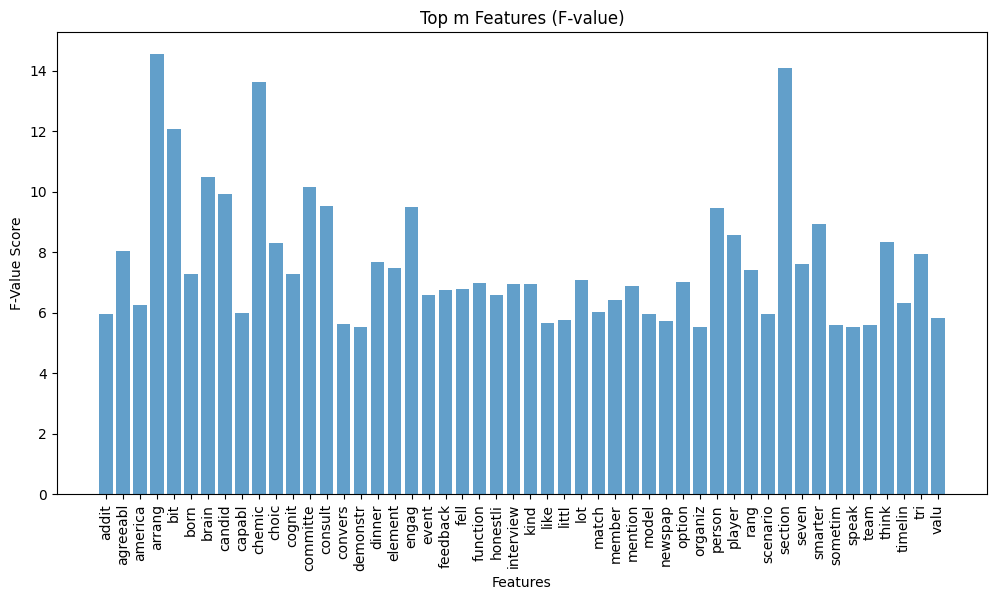

In [55]:
plt.figure(figsize=(12, 6))
selected_scores = selector.scores_[selector.get_support()]
plt.bar(selected_syntactic_features, selected_scores, alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-Value Score')
plt.title('Top m Features (F-value)')
plt.show()


In [39]:
# mutual information for regression scoring
mi_selector = SelectKBest(score_func=mutual_info_regression, k=m)
X_mi_selected = mi_selector.fit_transform(word_count, transcript_prosodic['Overall'])

# Get selected feature names
mi_selected_features = word_count.columns[mi_selector.get_support()]
print("Top m features (Mutual Info):", mi_selected_features.tolist())


Top m features (Mutual Info): ['addit', 'ahead', 'alway', 'anoth', 'believ', 'bit', 'build', 'calendar', 'caus', 'chang', 'complet', 'conflict', 'contact', 'develop', 'dorm', 'effici', 'environ', 'exampl', 'expect', 'focu', 'gener', 'girl', 'guess', 'handl', 'happen', 'hmm', 'involv', 'issu', 'lab', 'leader', 'member', 'mention', 'need', 'nice', 'plan', 'player', 'product', 'recent', 'risk', 'scienc', 'team', 'thank', 'think', 'type', 'uh', 'understand', 'wait', 'work', 'yeah', 'year']


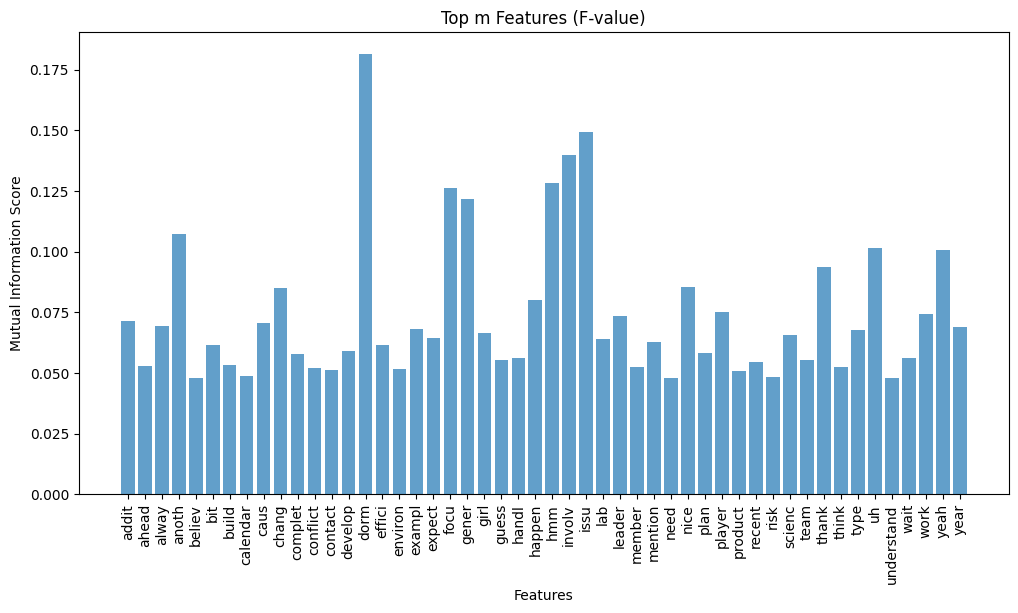

In [57]:
plt.figure(figsize=(12, 6))
mi_selected_scores = mi_selector.scores_[mi_selector.get_support()]
plt.bar(mi_selected_features, mi_selected_scores, alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Top m Features (F-value)')
plt.show()


In [41]:
# Using SelectKBest with f_regression for scoring
m = 50
selector = SelectKBest(score_func=f_regression, k=m)
X_selected = selector.fit_transform(word_count, transcript_prosodic['Excited'])

# Get selected feature names
selected_syntactic_excited_features = word_count.columns[selector.get_support()]
print("Top m features (F-value):", selected_syntactic_excited_features.tolist())

Top m features (F-value): ['actual', 'america', 'averag', 'born', 'chemic', 'choic', 'definit', 'dollar', 'dynam', 'engag', 'exampl', 'excit', 'heh', 'human', 'instead', 'join', 'kind', 'know', 'lot', 'love', 'make', 'manufactur', 'maryland', 'mayb', 'messag', 'parent', 'peopl', 'person', 'player', 'presid', 'product', 'realli', 'repres', 'right', 'section', 'sell', 'seven', 'share', 'size', 'someon', 'sometim', 'super', 'team', 'tire', 'took', 'tri', 'valu', 'wait', 'wanna', 'way']


In [42]:
# mutual information for regression scoring
mi_selector = SelectKBest(score_func=mutual_info_regression, k=m)
X_mi_selected = mi_selector.fit_transform(word_count, transcript_prosodic['Excited'])

# Get selected feature names
mi_selected_excited_features = word_count.columns[mi_selector.get_support()]
print("Top m features (Mutual Info):", mi_selected_excited_features.tolist())


Top m features (Mutual Info): ['abl', 'background', 'bit', 'demonstr', 'develop', 'direct', 'dollar', 'everi', 'exactli', 'exampl', 'flexibl', 'fli', 'forward', 'gener', 'given', 'hous', 'import', 'involv', 'know', 'look', 'lot', 'love', 'oppos', 'option', 'organ', 'overcom', 'person', 'player', 'probabl', 'product', 'professor', 'question', 'random', 'realiz', 'right', 'role', 'seven', 'someth', 'sometim', 'sophomor', 'strong', 'success', 'support', 'technic', 'thank', 'today', 'uh', 'ultim', 'um', 'way']


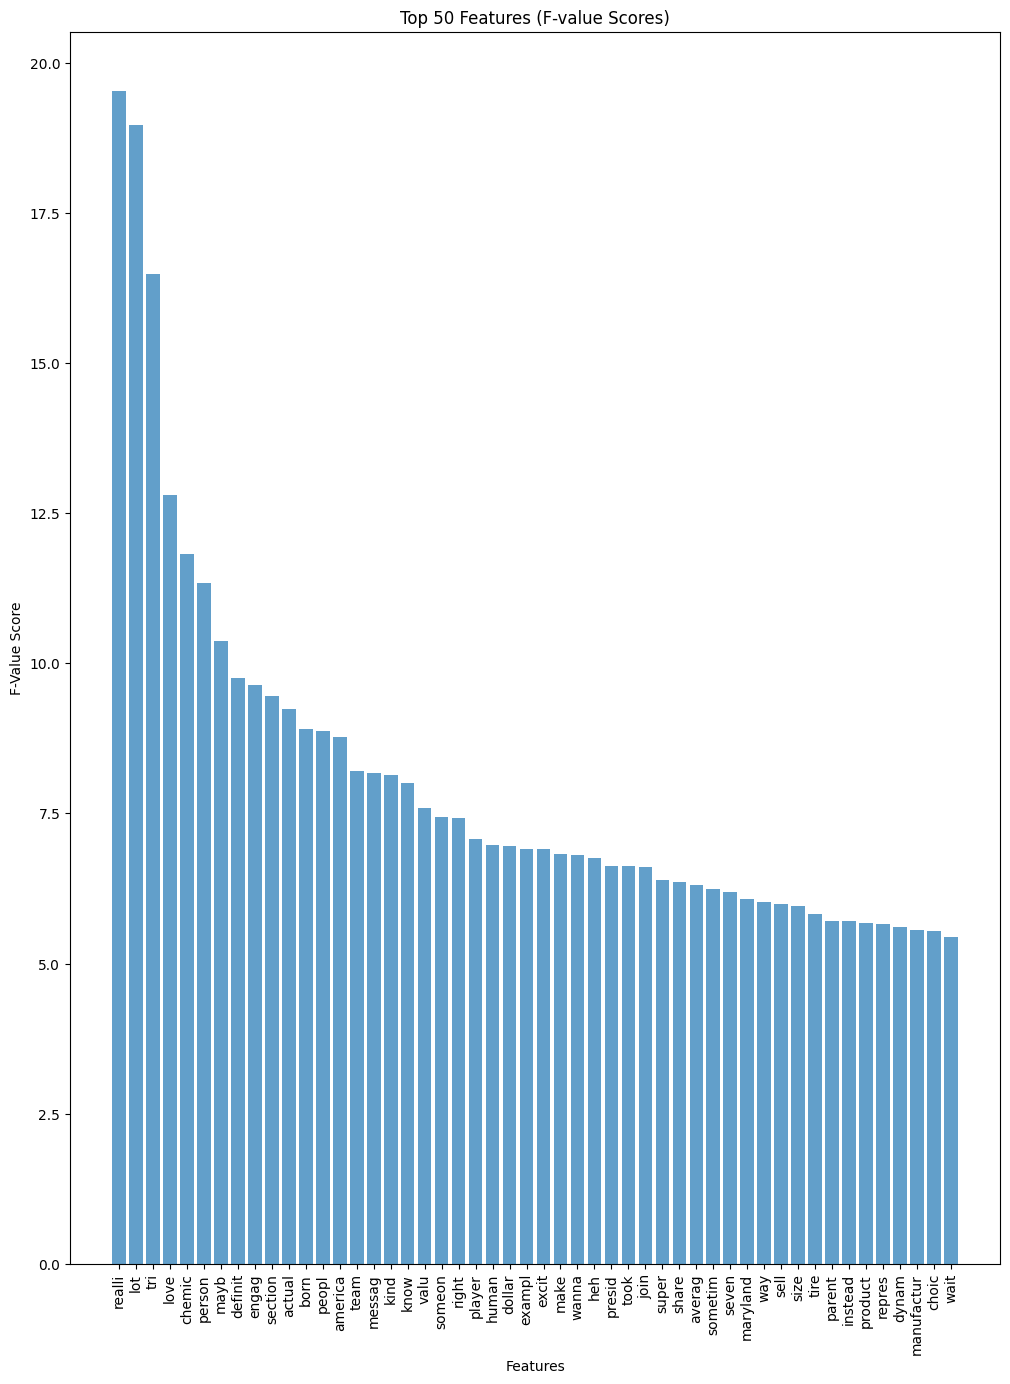

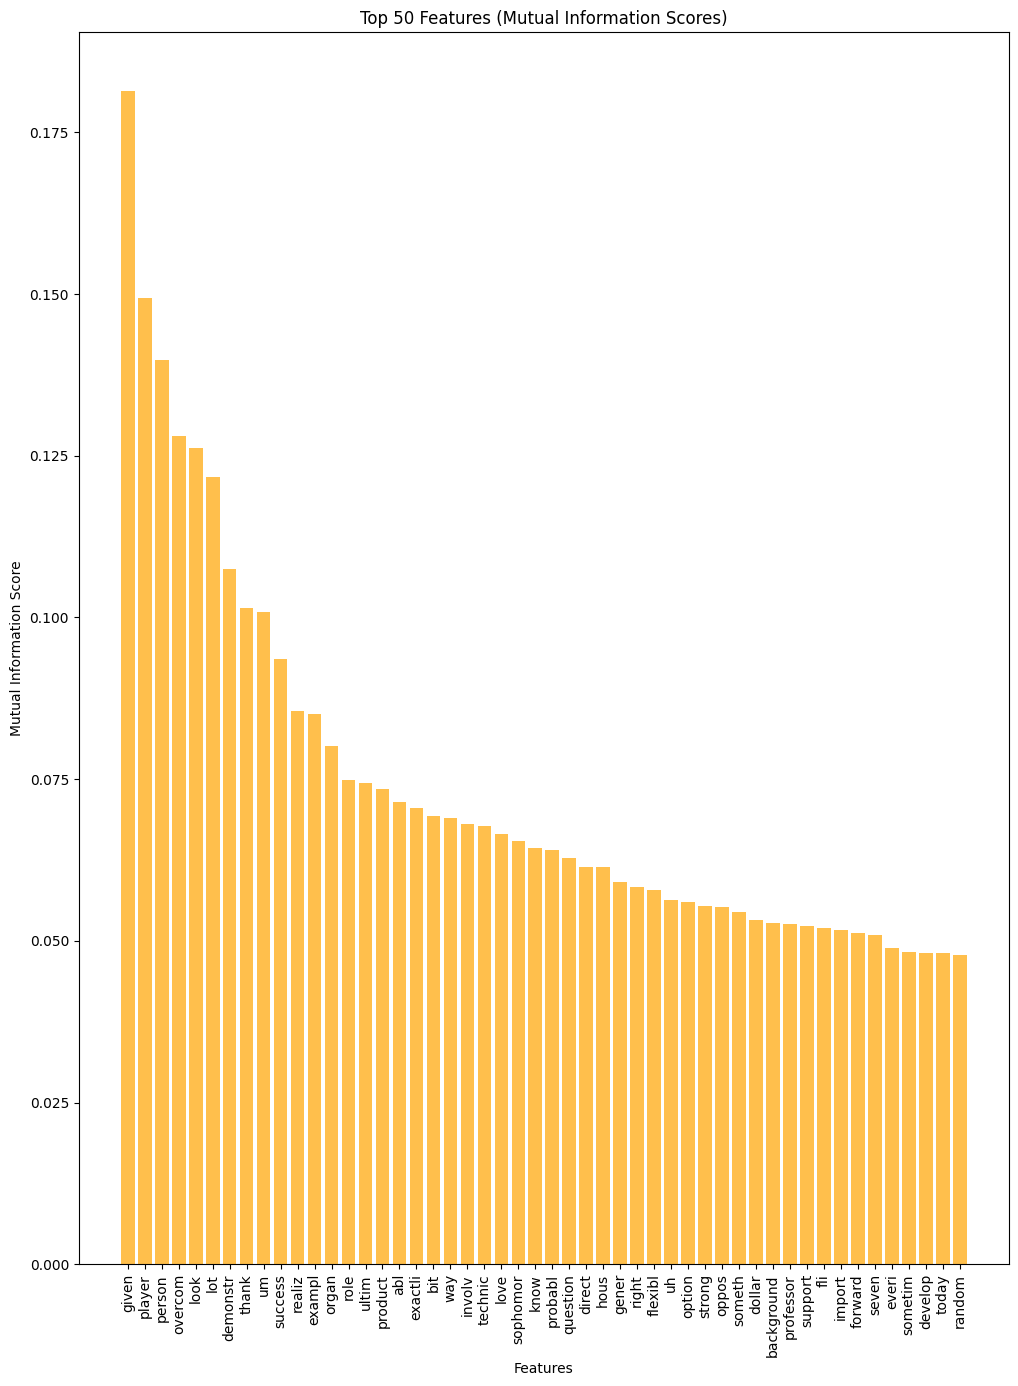

In [52]:
# Set k (number of top features to plot)
k = 50

# Sort and select top k features for F-value
f_scores_sorted = sorted(zip(word_count.columns, f_scores), key=lambda x: x[1], reverse=True)[:k]
f_features, f_top_scores = zip(*f_scores_sorted)

# Plot top k features based on F-value scores
plt.figure(figsize=(12, 16))
plt.bar(f_features, f_top_scores, alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-Value Score')
plt.title(f'Top {k} Features (F-value Scores)')
plt.show()

# Sort and select top k features for MI scores
mi_scores_sorted = sorted(zip(word_count.columns, mi_scores), key=lambda x: x[1], reverse=True)[:k]
mi_features, mi_top_scores = zip(*mi_scores_sorted)

# Plot top k features based on MI scores
plt.figure(figsize=(12, 16))
plt.bar(mi_features, mi_top_scores, alpha=0.7, color='orange')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title(f'Top {k} Features (Mutual Information Scores)')
plt.show()


In [45]:
word_count_scores = word_count.copy()
word_count_scores['Overall'] = transcript_prosodic['Overall']
word_count_scores['Excited'] = transcript_prosodic['Excited']

In [48]:
# Compute the correlation matrix
correlation_matrix = word_count_scores.corr()

# Extract correlations with 'Overall'
overall_corr = correlation_matrix['Overall']

# Drop 'Overall' itself from the list (self-correlation is always 1)
overall_corr = overall_corr.drop('Overall').drop('Excited')

# Sort by absolute correlation value in descending order
sorted_corr = overall_corr.abs().sort_values(ascending=False)

# Get the top k features
k = 50  # Set your desired number of top features
top_k_features = sorted_corr.head(k)

print("Top K Features Correlating with 'Overall':")
# print(top_k_features)

# Optional: Get the corresponding column names
top_k_feature_names = top_k_features.index.tolist()
print("\nTop K Feature Names:", top_k_feature_names)

Top K Features Correlating with 'Overall':

Top K Feature Names: ['arrang', 'section', 'chemic', 'bit', 'brain', 'committe', 'candid', 'consult', 'engag', 'person', 'smarter', 'player', 'think', 'choic', 'agreeabl', 'tri', 'dinner', 'seven', 'element', 'rang', 'cognit', 'born', 'lot', 'option', 'function', 'interview', 'kind', 'mention', 'fell', 'feedback', 'honestli', 'event', 'member', 'timelin', 'america', 'match', 'capabl', 'scenario', 'model', 'addit', 'valu', 'littl', 'newspap', 'like', 'convers', 'team', 'sometim', 'demonstr', 'organiz', 'speak']


In [49]:
# Extract correlations with 'Overall'
excited_corr = correlation_matrix['Excited']

# Drop 'Overall' itself from the list (self-correlation is always 1)
excited_corr = excited_corr.drop('Overall').drop('Excited')

# Sort by absolute correlation value in descending order
sorted_corr = excited_corr.abs().sort_values(ascending=False)

# Get the top k features
k = 50  # Set your desired number of top features
top_k_excited_features = sorted_corr.head(k)

print("Top K Features Correlating with 'Excited':")
# print(top_k_excited_features)

# Optional: Get the corresponding column names
top_k_feature_excited_names = top_k_excited_features.index.tolist()
print("\nTop K Feature Names:", top_k_feature_excited_names)

Top K Features Correlating with 'Excited':

Top K Feature Names: ['realli', 'lot', 'tri', 'love', 'chemic', 'person', 'mayb', 'definit', 'engag', 'section', 'actual', 'born', 'peopl', 'america', 'team', 'messag', 'kind', 'know', 'valu', 'someon', 'right', 'player', 'human', 'dollar', 'exampl', 'excit', 'make', 'wanna', 'heh', 'presid', 'took', 'join', 'super', 'share', 'averag', 'sometim', 'seven', 'maryland', 'way', 'sell', 'size', 'tire', 'parent', 'instead', 'product', 'repres', 'dynam', 'manufactur', 'choic', 'wait']


Syntactic Vectorization with TFIDF Vectorizer


In [62]:
# Syntactic vectorizer: TFIDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', min_df=3)
tfidf_matrix = tfidf.fit_transform(transcript_prosodic['transcript'])
feature_names_tf = tfidf.get_feature_names_out()
tfidf_count = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names_tf)
print(tfidf_count.shape)
tfidf_count.head()

(138, 1331)


,abil,abl,abroad,absolut,academ,academia,accept,access,accomplish,accord,...,xx,ya,ye,yea,yeah,year,yep,young,younger,zone
0,0.0,0.045518,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.068296,...,0.0,0.0,0.033349,0.0,0.000000,0.019961,0.0,0.0,0.0,0.0
1,0.0,0.013922,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.042779,0.097681,0.0,0.0,0.0,0.0
2,0.0,0.043175,0.0,0.0,0.039866,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.022112,0.037867,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.088432,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.024952,0.0,0.0,0.000000,0.0,0.0,0.0,0.104109,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


Statistical Features (word count and average word length)


In [64]:
# Statistical Features (word count and average word length)
semantic_features = pd.DataFrame()
# Word Count for the entire interview
semantic_features['Participant'] = transcript_prosodic['Participant']
semantic_features['word_count'] = transcript_prosodic['transcript'].apply(lambda x: len(x.split()))

# Average word length for the interview
semantic_features['avg_word_length'] = transcript_prosodic['transcript'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

semantic_features.head()

,Participant,word_count,avg_word_length
0,p1,292,4.815068
1,p10,539,4.495362
2,p11,348,5.014368
3,p12,287,4.637631
4,p13,307,4.931596


Part of speech tagging

In [65]:
from collections import Counter

# Part of speech tagging
semantic_features['pos tagging'] = transcript_prosodic['transcript'].apply(lambda x: pos_tag(word_tokenize(x)))
semantic_features['pos tagging'].head()
# NN: Noun singular
# VB: Verb base form
# JJ: Adjective
# RB: Adverb
# DT: Determiner
# IN: Preposition or subordination conjunction
# Count POS tags

def pos_tag_counter(pos_tags):
    tags = [tag for _, tag in pos_tags]  # Extract tags only
    return Counter(tags)

# Apply to generate a Counter for each transcript
semantic_features['pos_tag_counts'] = semantic_features['pos tagging'].apply(pos_tag_counter)


# Get a list of all unique POS tags in the dataset
all_pos_tags = set(tag for tags in semantic_features['pos_tag_counts'] for tag in tags.keys())

# Convert counts to a feature matrix
pos_tag_matrix = pd.DataFrame(list(semantic_features['pos_tag_counts'].apply(lambda x: {tag: x.get(tag, 0) for tag in all_pos_tags})))

# Combine with the original features
semantic_features = pd.concat([semantic_features, pos_tag_matrix], axis=1)


In [66]:
semantic_features.head()

,Participant,word_count,avg_word_length,pos tagging,pos_tag_counts,NNP,PRP,TO,WRB,IN,...,WP$,CD,VBD,VBZ,MD,JJS,WP,VB,RP,WDT
0,p1,292,4.815068,"[(im, JJ), (pretti, NNS), (good, JJ), (ok, RB)...","{'JJ': 58, 'NNS': 6, 'RB': 17, 'VBP': 19, 'NN'...",2,0,0,0,10,...,1,5,6,3,1,1,0,13,0,0
1,p10,539,4.495362,"[(great, JJ), (okay, JJ), (littl, NN), (resurg...","{'JJ': 137, 'NN': 249, 'VBD': 16, 'VBP': 40, '...",0,4,0,0,18,...,0,6,16,3,8,4,0,19,0,0
2,p11,348,5.014368,"[(tell, VB), (uhh, JJ), (junior, JJ), (mit, NN...","{'VB': 16, 'JJ': 67, 'NN': 168, 'IN': 12, 'NNS...",0,1,0,0,12,...,0,3,6,1,6,3,0,16,0,0
3,p12,287,4.637631,"[(today, NN), (good, JJ), (good, JJ), (tell, N...","{'NN': 147, 'JJ': 55, 'IN': 13, 'VBP': 19, 'RB...",0,1,0,0,13,...,0,5,8,4,5,0,0,17,0,0
4,p13,307,4.931596,"[(today, NN), (good, JJ), (good, JJ), (tell, N...","{'NN': 166, 'JJ': 67, 'IN': 16, 'VBZ': 3, 'VBP...",0,0,0,0,16,...,0,3,10,3,3,1,0,8,0,0


In [67]:
semantic_features.shape

(138, 35)

In [68]:
semantic_features.drop('pos tagging', axis=1, inplace=True)

In [69]:
semantic_features.drop('pos_tag_counts', axis=1, inplace=True)

In [70]:
semantic_features.head()

,Participant,word_count,avg_word_length,NNP,PRP,TO,WRB,IN,VBN,RBS,...,WP$,CD,VBD,VBZ,MD,JJS,WP,VB,RP,WDT
0,p1,292,4.815068,2,0,0,0,10,4,0,...,1,5,6,3,1,1,0,13,0,0
1,p10,539,4.495362,0,4,0,0,18,7,0,...,0,6,16,3,8,4,0,19,0,0
2,p11,348,5.014368,0,1,0,0,12,3,0,...,0,3,6,1,6,3,0,16,0,0
3,p12,287,4.637631,0,1,0,0,13,2,0,...,0,5,8,4,5,0,0,17,0,0
4,p13,307,4.931596,0,0,0,0,16,4,0,...,0,3,10,3,3,1,0,8,0,0


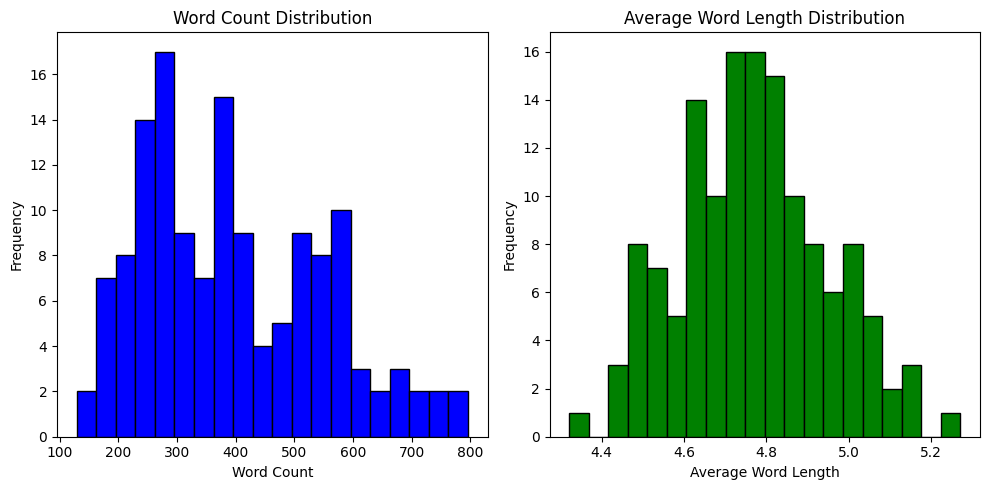

In [72]:
# Visualization
plt.figure(figsize=(10, 5))

# Plot word count
plt.subplot(1, 2, 1)
plt.hist(semantic_features['word_count'], bins=20, color='blue', edgecolor='black')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Plot average word length
plt.subplot(1, 2, 2)
plt.hist(semantic_features['avg_word_length'], bins=20, color='green', edgecolor='black')
plt.title('Average Word Length Distribution')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Sentiment Analysis with Vader


In [79]:
# Sentiment Analysis with Vader
analyzer = SentimentIntensityAnalyzer()
semantic_features['sentiment'] = transcript_prosodic['transcript'].apply(lambda x: analyzer.polarity_scores(x))

semantic_features['sentiment'].head()

,sentiment
0,"{'neg': 0.029, 'neu': 0.736, 'pos': 0.235, 'co..."
1,"{'neg': 0.037, 'neu': 0.8, 'pos': 0.163, 'comp..."
2,"{'neg': 0.033, 'neu': 0.778, 'pos': 0.189, 'co..."
3,"{'neg': 0.036, 'neu': 0.644, 'pos': 0.32, 'com..."
4,"{'neg': 0.055, 'neu': 0.678, 'pos': 0.267, 'co..."


In [80]:
# Expand the sentiment scores into separate columns
sentiment_df = semantic_features['sentiment'].apply(pd.Series)

# Add the sentiment columns back to the main feature DataFrame
semantic_features = pd.concat([semantic_features, sentiment_df], axis=1)

# Drop the original dictionary column
semantic_features.drop('sentiment', axis=1, inplace=True)

# Display the updated feature DataFrame
semantic_features.head()

,Participant,word_count,avg_word_length,NNP,PRP,TO,WRB,IN,VBN,RBS,...,MD,JJS,WP,VB,RP,WDT,neg,neu,pos,compound
0,p1,292,4.815068,2,0,0,0,10,4,0,...,1,1,0,13,0,0,0.029,0.736,0.235,0.9958
1,p10,539,4.495362,0,4,0,0,18,7,0,...,8,4,0,19,0,0,0.037,0.800,0.163,0.9965
2,p11,348,5.014368,0,1,0,0,12,3,0,...,6,3,0,16,0,0,0.033,0.778,0.189,0.9951
3,p12,287,4.637631,0,1,0,0,13,2,0,...,5,0,0,17,0,0,0.036,0.644,0.320,0.9983
4,p13,307,4.931596,0,0,0,0,16,4,0,...,3,1,0,8,0,0,0.055,0.678,0.267,0.9974


In [81]:
semantic_features_scores = pd.merge(semantic_features, scores_data, on='Participant')
semantic_features_scores.head()

,Participant,word_count,avg_word_length,NNP,PRP,TO,WRB,IN,VBN,RBS,...,WP,VB,RP,WDT,neg,neu,pos,compound,Overall,Excited
0,p1,292,4.815068,2,0,0,0,10,4,0,...,0,13,0,0,0.029,0.736,0.235,0.9958,5.297316,5.043890
1,p10,539,4.495362,0,4,0,0,18,7,0,...,0,19,0,0,0.037,0.800,0.163,0.9965,4.725115,4.383947
2,p11,348,5.014368,0,1,0,0,12,3,0,...,0,16,0,0,0.033,0.778,0.189,0.9951,5.010430,4.297760
3,p12,287,4.637631,0,1,0,0,13,2,0,...,0,17,0,0,0.036,0.644,0.320,0.9983,5.038526,5.322526
4,p13,307,4.931596,0,0,0,0,16,4,0,...,0,8,0,0,0.055,0.678,0.267,0.9974,4.251251,3.579510


In [82]:
columns_to_include = list(semantic_features_scores.columns)
columns_to_include.remove('Participant')
print(columns_to_include)

['word_count', 'avg_word_length', 'NNP', 'PRP', 'TO', 'WRB', 'IN', 'VBN', 'RBS', 'RB', 'VBG', 'NNS', 'NN', 'VBP', 'DT', 'JJ', 'JJR', 'EX', 'CC', 'FW', 'RBR', 'UH', 'WP$', 'CD', 'VBD', 'VBZ', 'MD', 'JJS', 'WP', 'VB', 'RP', 'WDT', 'neg', 'neu', 'pos', 'compound', 'Overall', 'Excited']


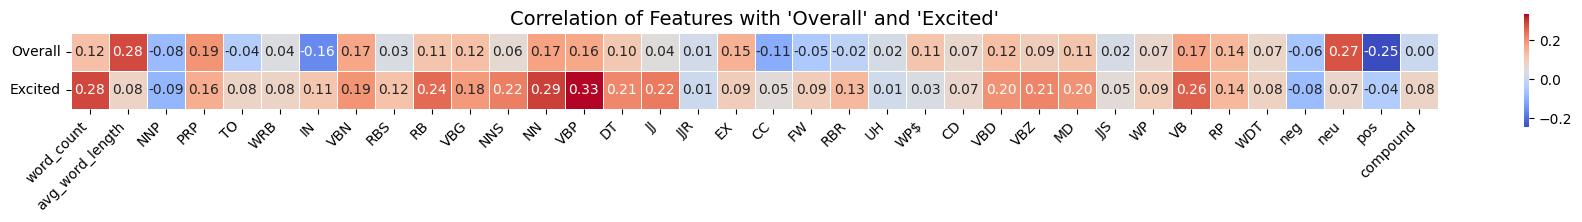

In [83]:
# List of columns to correlate with 'Overall' and 'Excited'
columns_to_include = [col for col in semantic_features_scores.columns if col not in ['Overall', 'Excited', 'Participant']]

# # Compute correlations with 'Overall' and 'Excited'
# correlations_overall = semantic_features_scores[columns_to_include].corrwith(semantic_features_scores['Overall'])
# correlations_excited = semantic_features_scores[columns_to_include].corrwith(semantic_features_scores['Excited'])

# Combine the correlations into a DataFrame for easier plotting
correlation_data = pd.DataFrame({
    'Overall': semantic_features_scores[columns_to_include].corrwith(semantic_features_scores['Overall']),
    'Excited': semantic_features_scores[columns_to_include].corrwith(semantic_features_scores['Excited'])
}).T

# Set the figure size dynamically based on the number of columns
plt.figure(figsize=(len(columns_to_include) * 0.5, 2))  # Adjust 0.5 to make it more compact or spacious

# Create the heatmap
sns.heatmap(
    correlation_data,
    annot=True,
    cmap='coolwarm',
    cbar=True,
    fmt=".2f",
    linewidths=0.5,
    square=True
)

# Add titles and labels
plt.title("Correlation of Features with 'Overall' and 'Excited'", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate column names for better readability
plt.yticks(fontsize=10)
plt.tight_layout()  # Automatically adjust spacing
plt.show()

In [84]:
correlation_data.head()

,word_count,avg_word_length,NNP,PRP,TO,WRB,IN,VBN,RBS,RB,...,MD,JJS,WP,VB,RP,WDT,neg,neu,pos,compound
Overall,0.120805,0.280579,-0.082579,0.192142,-0.037715,0.035023,-0.162773,0.165152,0.028960,0.113236,...,0.110754,0.02298,0.066476,0.165895,0.136911,0.071637,-0.059861,0.269627,-0.248188,0.001910
Excited,0.282965,0.077852,-0.090361,0.155286,0.075795,0.075395,0.109405,0.193506,0.115192,0.244321,...,0.195432,0.04954,0.093644,0.256073,0.135415,0.081070,-0.080749,0.067593,-0.040926,0.075625


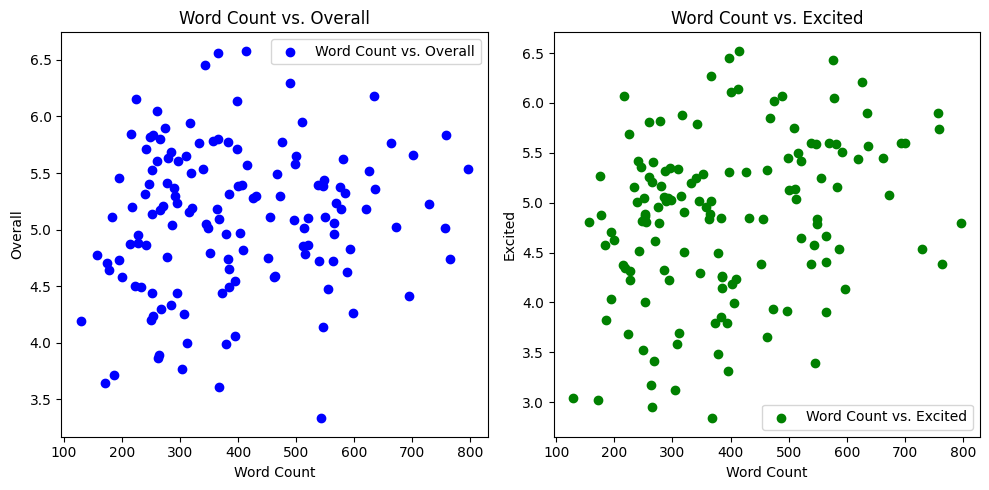

In [86]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(semantic_features_scores['word_count'], semantic_features_scores['Overall'], marker='o', linestyle='-', color='blue', label='Word Count vs. Overall')
plt.title('Word Count vs. Overall')
plt.xlabel('Word Count')
plt.ylabel('Overall')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(semantic_features_scores['word_count'], semantic_features_scores['Excited'], marker='o', linestyle='-', color='green', label='Word Count vs. Excited')
plt.title('Word Count vs. Excited')
plt.xlabel('Word Count')
plt.ylabel('Excited')
plt.legend()

plt.tight_layout()
plt.show()

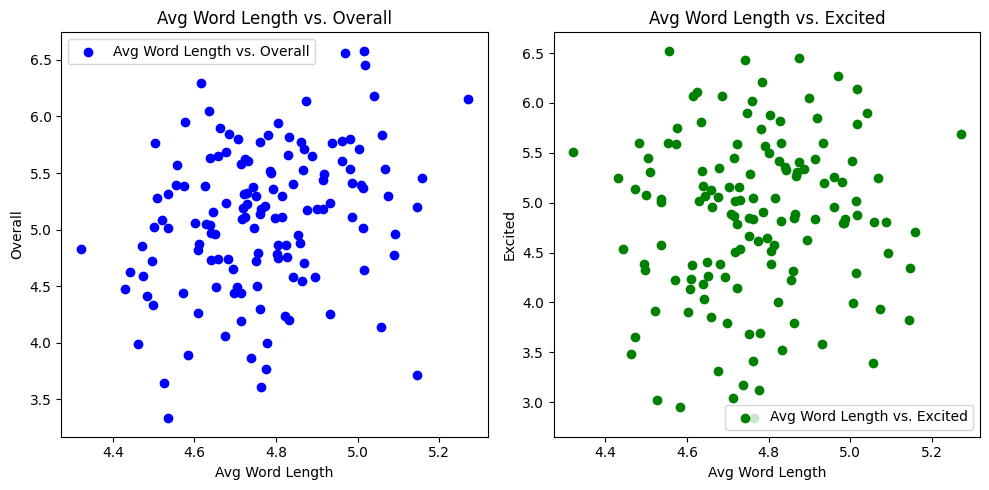

In [87]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(semantic_features_scores['avg_word_length'], semantic_features_scores['Overall'], marker='o', linestyle='-', color='blue', label='Avg Word Length vs. Overall')
plt.title('Avg Word Length vs. Overall')
plt.xlabel('Avg Word Length')
plt.ylabel('Overall')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(semantic_features_scores['avg_word_length'], semantic_features_scores['Excited'], marker='o', linestyle='-', color='green', label='Avg Word Length vs. Excited')
plt.title('Avg Word Length vs. Excited')
plt.xlabel('Avg Word Length')
plt.ylabel('Excited')
plt.legend()

plt.tight_layout()
plt.show()

In [92]:
columns_to_include = [col for col in semantic_features_scores.columns if col not in ['Overall', 'Excited', 'Participant', 'word_count', 'avg_word_length','pos', 'neg', 'neu', 'compound']]
print(columns_to_include)


['NNP', 'PRP', 'TO', 'WRB', 'IN', 'VBN', 'RBS', 'RB', 'VBG', 'NNS', 'NN', 'VBP', 'DT', 'JJ', 'JJR', 'EX', 'CC', 'FW', 'RBR', 'UH', 'WP$', 'CD', 'VBD', 'VBZ', 'MD', 'JJS', 'WP', 'VB', 'RP', 'WDT']


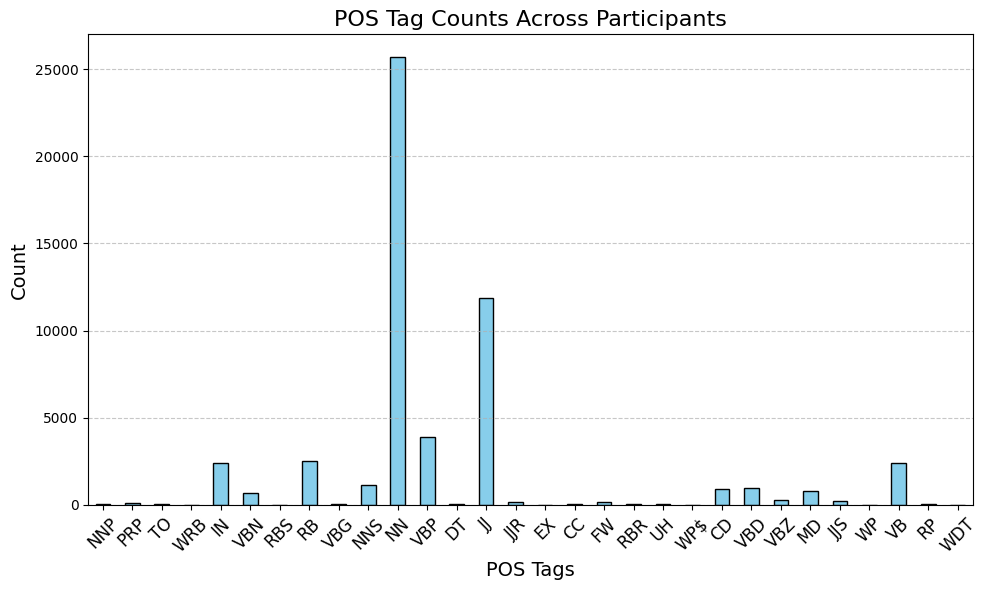

In [98]:


# Sum the counts across participants for each POS tag
pos_counts = semantic_features_scores[columns_to_include].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
pos_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('POS Tag Counts Across Participants', fontsize=16)
plt.xlabel('POS Tags', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

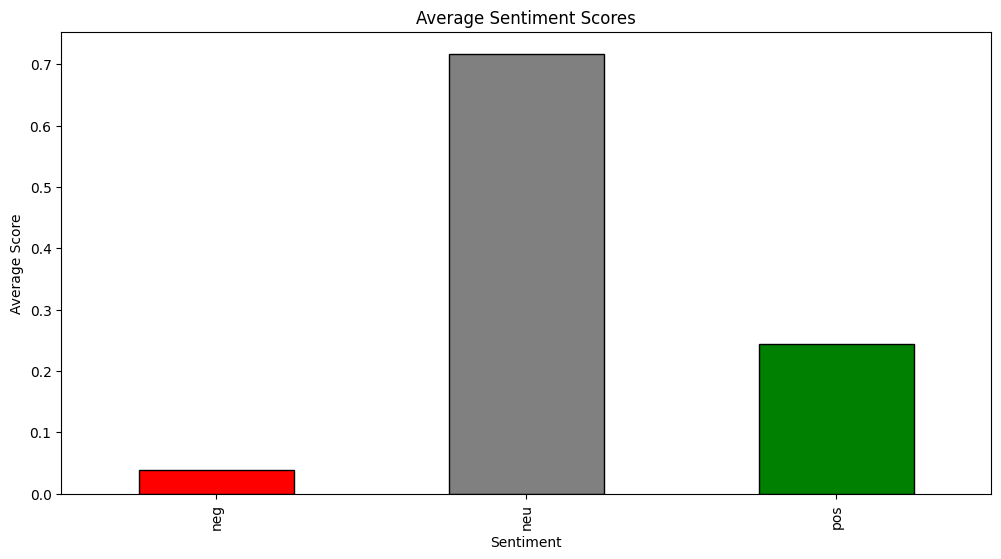

In [99]:
plt.figure(figsize=(12, 6))
semantic_features_scores[['neg', 'neu', 'pos']].mean().plot(kind='bar', color=['red', 'grey', 'green'], edgecolor='black')
plt.title('Average Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Average Score')
plt.show()

In [ ]:


# List of columns to correlate with 'Overall' and 'Excited'
columns_to_include = [col for col in semantic_features_scores.columns if col not in ['Overall', 'Excited', 'Participant']]

# Scale features
scaler = StandardScaler()
semantic_features_scaled = scaler.fit_transform(semantic_features_scores[columns_to_include])


In [104]:
# Using SelectKBest with f_regression for scoring
m = 15
selector = SelectKBest(score_func=f_regression, k=m)
X_selected = selector.fit_transform(semantic_features_scaled, semantic_features_scores['Overall'])

# Get selected feature names
selected_semantic_features = semantic_features_scores[columns_to_include].columns[selector.get_support()]
print("Top m features (F-value):", selected_semantic_features.tolist())

Top m features (F-value): ['word_count', 'avg_word_length', 'PRP', 'IN', 'VBN', 'RB', 'VBG', 'NN', 'VBP', 'EX', 'VBD', 'VB', 'RP', 'neu', 'pos']


In [105]:
# mutual information for regression scoring
mi_selector = SelectKBest(score_func=mutual_info_regression, k=m)
X_mi_selected = mi_selector.fit_transform(semantic_features_scaled, scores_data['Overall'])

# Get selected feature names
mi_selected_features = semantic_features_scores[columns_to_include].columns[mi_selector.get_support()]
print("Top m features (Mutual Info):", mi_selected_features.tolist())


Top m features (Mutual Info): ['word_count', 'avg_word_length', 'RBS', 'VBG', 'NNS', 'NN', 'VBP', 'JJ', 'FW', 'VBZ', 'MD', 'JJS', 'RP', 'neu', 'pos']


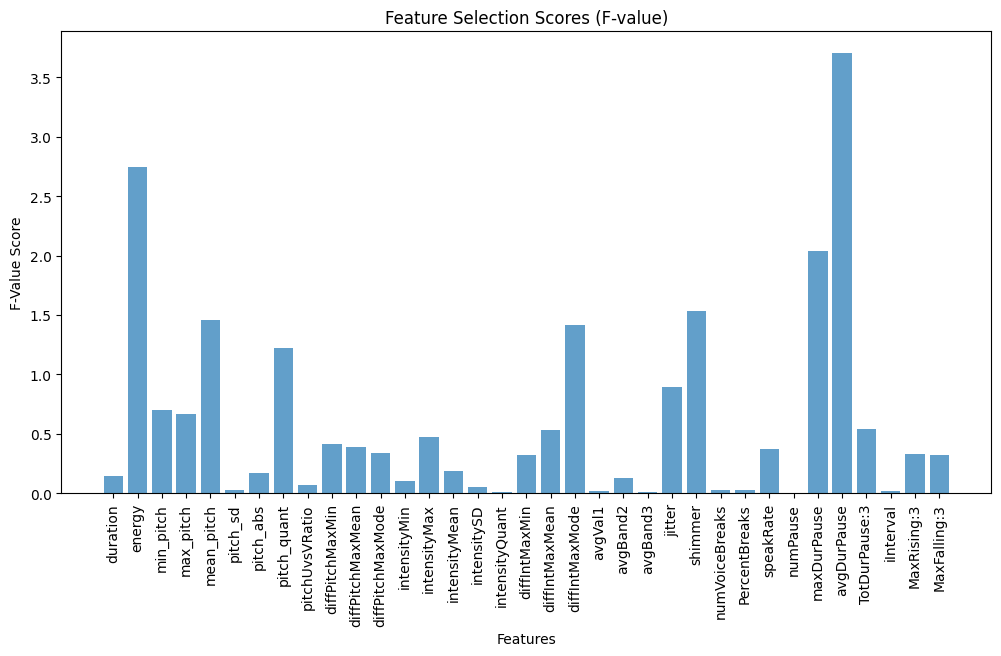

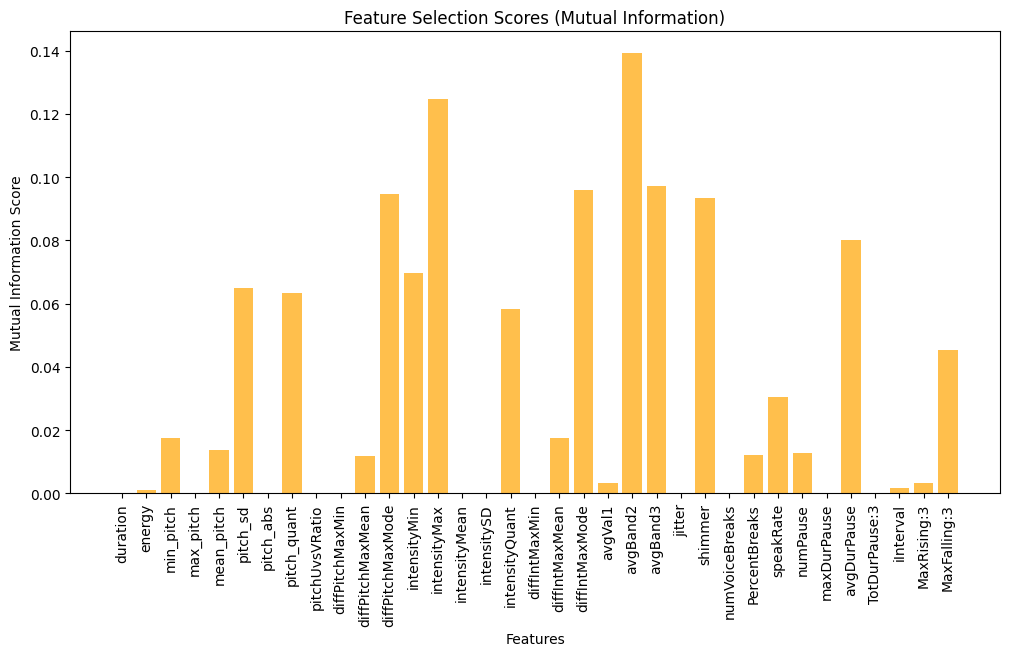

In [ ]:
# F-value scores
f_scores = selector.scores_

# Visualize F-value scores
plt.figure(figsize=(12, 6))
plt.bar(prosodic_features.columns, f_scores, alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-Value Score')
plt.title('Feature Selection Scores (F-value)')
plt.show()

# Mutual Information Scores (Optional)
mi_scores = mi_selector.scores_
plt.figure(figsize=(12, 6))
plt.bar(prosodic_features.columns, mi_scores, alpha=0.7, color='orange')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Feature Selection Scores (Mutual Information)')
plt.show()


In [ ]:
# Intersection of selected features
intersection_features = set(selected_features).intersection(mi_selected_features)
print("Common features:", list(intersection_features))


Common features: ['diffIntMaxMode', 'shimmer', 'pitch_quant', 'avgDurPause']


In [ ]:
# Union of selected features
union_features = set(selected_features).union(mi_selected_features)
print("Hybrid feature set:", list(union_features))


Hybrid feature set: ['pitch_quant', 'intensityMax', 'avgDurPause', 'diffIntMaxMode', 'pitch_sd', 'avgBand2', 'energy', 'diffPitchMaxMode', 'shimmer', 'maxDurPause', 'mean_pitch', 'intensityMin', 'min_pitch', 'max_pitch', 'jitter', 'avgBand3']


Word Embeddings with BERT


In [98]:
# Word embeddings with BERT (Hugging Face)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [99]:
# Separate interveiw into sentences
def process_transcript(text):
  sentences = re.split(r'(?<=\|)', text)
  cleaned_sentences = [
    re.sub(r'^(interviewer:|interviewee:)\s*', '', s.strip().replace('|', '')) for s in sentences if s.strip()
  ]
  return cleaned_sentences

transcript_prosodic['Processed Transcript'] = transcript_prosodic['transcript'].apply(process_transcript)
advanced_features = pd.DataFrame()

def get_bert_embeddings(sentences):
    embeddings = []
    for sentence in sentences:
        # Tokenize and get input Id and attention mask
        inputs = tokenizer(sentence, return_tensors="pt", padding="max_length", truncation=True, max_length=20)

        # Use BERT
        with torch.no_grad():
            outputs = model(**inputs)

        # Pool output
        cls_embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
        embeddings.append(cls_embedding)

    # Combine sentence embeddings into a single 768-dimensional vector
    transcript_embedding = np.mean(embeddings, axis=0)  # Take the mean of all sentence embeddings
    return transcript_embedding

advanced_features['word embeddings'] = transcript_prosodic['Processed Transcript'].apply(get_bert_embeddings)

advanced_features['word embeddings'].head()

,word embeddings
0,"[0.017016187, -0.034937337, 0.14796308, -0.000..."
1,"[0.10268941, -0.08198997, 0.27217576, 0.043742..."
2,"[0.15770096, -0.117634885, 0.053557727, 0.0065..."
3,"[0.16491431, -0.16346881, 0.18370056, -0.02423..."
4,"[0.05813729, -0.097823314, 0.14181888, -0.0148..."


In [100]:
advanced_features.head()

,word embeddings
0,"[0.017016187, -0.034937337, 0.14796308, -0.000..."
1,"[0.10268941, -0.08198997, 0.27217576, 0.043742..."
2,"[0.15770096, -0.117634885, 0.053557727, 0.0065..."
3,"[0.16491431, -0.16346881, 0.18370056, -0.02423..."
4,"[0.05813729, -0.097823314, 0.14181888, -0.0148..."


In [102]:
advanced_features['word embeddings'].iloc[3].shape

(768,)

In [103]:
word_embeddings = advanced_features['word embeddings']


# Function to pad or truncate embeddings
def pad_or_truncate(embedding):
    embedding = np.array(embedding)
    return np.concatenate([embedding])

# Apply padding/truncation to all embeddings
padded_embeddings = word_embeddings.apply(lambda x: pad_or_truncate(x))

# Convert to feature matrix (2D numpy array)
advanced_feature_matrix = np.vstack(padded_embeddings)

print("Feature Matrix Shape:", advanced_feature_matrix.shape)

Feature Matrix Shape: (138, 768)


In [105]:
advanced_features = pd.DataFrame(advanced_feature_matrix)
advanced_features.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.017016,-0.034937,0.147963,-0.000207,0.124394,-0.190716,0.118650,0.538433,0.012451,-0.190389,...,0.015231,-0.201107,0.043915,-0.339073,-0.106830,-0.018594,0.018963,-0.035835,0.117100,0.007626
1,0.102689,-0.081990,0.272176,0.043743,0.212917,-0.147118,0.034501,0.546522,0.025026,-0.189929,...,0.113734,-0.283832,0.016985,-0.416888,-0.017138,-0.129914,-0.012175,-0.089880,0.143083,0.048885
2,0.157701,-0.117635,0.053558,0.006534,0.215945,-0.261041,0.076638,0.730412,-0.036409,-0.151016,...,-0.025427,-0.172351,-0.015352,-0.380699,-0.147762,-0.016276,0.088394,-0.079264,0.134046,-0.042889
3,0.164914,-0.163469,0.183701,-0.024239,0.167937,-0.202663,0.090117,0.584129,-0.023010,-0.139369,...,0.038133,-0.186950,-0.004396,-0.347414,-0.056845,-0.137367,0.066210,-0.037993,0.163787,-0.040648
4,0.058137,-0.097823,0.141819,-0.014862,0.170733,-0.222198,0.045198,0.520938,-0.006149,-0.185434,...,0.084046,-0.202326,0.013118,-0.315198,-0.048743,-0.120947,-0.001607,-0.047954,0.110444,-0.096881


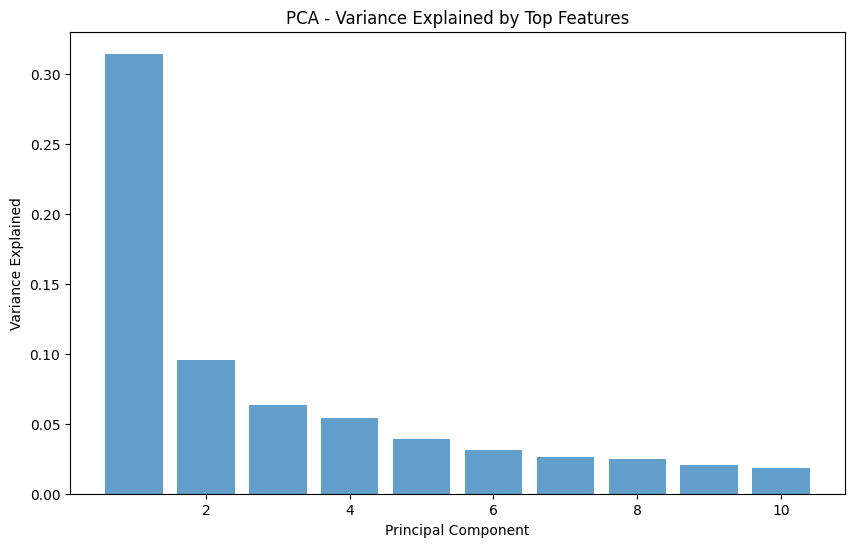

In [108]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Combine all embeddings into a single array
embeddings = advanced_features.values
pca_features = pd.DataFrame()


# Perform PCA on the combined embeddings
def perform_pca(embeddings, n_components=10):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(embeddings)
    return principal_components, pca.explained_variance_ratio_

pca_results, explained_variance_ratios = perform_pca(embeddings, n_components=10)

# Add PCA-transformed embeddings to the features DataFrame
pca_features['pca word embeddings'] = list(pca_results)

# Visualize the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA - Variance Explained by Top Features')
plt.show()


In [113]:
# Expand the PCA embeddings into individual columns
pca_columns = pca_features['pca word embeddings'].apply(pd.Series)

# Rename columns to be descriptive, e.g., `PCA_1`, `PCA_2`, ...
pca_columns.columns = [f'PCA_{i+1}' for i in range(pca_columns.shape[1])]

In [114]:
pca_columns.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,0.170553,0.280320,-0.514425,-0.480636,-0.637059,0.337642,0.088492,-0.168293,0.104912,0.037549
1,-0.640362,0.466097,-0.248434,0.224444,-0.259916,-0.088268,0.028373,-0.372146,0.295569,0.036703
2,0.980338,0.100353,-0.620648,0.175977,-0.380799,-0.009104,-0.461909,0.057345,-0.243237,-0.417481
3,-0.011068,0.074486,-0.488124,-0.111407,0.045441,0.352792,-0.188229,-0.022867,-0.026531,-0.117704
4,-0.264942,-0.263039,-0.425093,0.187700,-0.106619,0.475594,0.058293,0.078092,-0.240858,0.108663


In [115]:
pca_columns.corrwith(transcript_prosodic['Overall'])

,0
PCA_1,0.131262
PCA_2,-0.105659
PCA_3,0.144061
PCA_4,-0.001381
PCA_5,0.080280
PCA_6,-0.005165
PCA_7,-0.103362
PCA_8,-0.026171
PCA_9,0.000695
PCA_10,-0.178047


In [116]:
structured_transcripts = pd.read_csv("https://raw.githubusercontent.com/gyanigk/ML-HW4/refs/heads/main/data/structured_transcripts.csv")
structured_transcripts.head()


,participant_id,question,answer
0,p1q1,So how are you doing?,Im pretty good.
1,p1q2,Ok well so please tell me about yourself.,ok uhm so have you looked at my resume or sh...
2,p1q3,mhhmm,So ah my interest kinda laid both in a little...
3,p1q4,So please tell me about a time that you demons...,Ok uhm one of the things we have to do for C...
4,p1q5,Tell me about a time when your working on a te...,Ahh I guess the easiest team project I just I...


In [ ]:
structured_transcripts.shape

(1540, 4)

Language Features Extracted:
- Syntactic Vectorization with CountVectorizer
- Syntactic Vectorization with TFIDF Vectorizer
- Word Count
- Average Word Length
- Part of Speech Tagging
- Sentiment Analysis with Vader
- Word Embedding with BERT
  
A total of 7 distinctive features.

The human readable features are: CountVectorizer because it is a count of the words throughout the interview, the Statistical Features, Part of Speech Tagging (with a little extra interpretation), and Sentiment Analysis with Vader.

Language feature selection part


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define the features and the target outcomes
X = features[['word count', 'avg word length', 'pos tagging', 'sentiment', 'word embeddings']]
y = outcomes  # Assuming 'outcomes' is a predefined variable containing the target outcomes

# Apply SelectKBest to extract the top k features
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support(indices=True)]

# Display the selected features and their scores
feature_scores = selector.scores_[selector.get_support()]
for feature, score in zip(selected_features, feature_scores):
    print(f"Feature: {feature}, Score: {score}")

# Discuss findings
# The selected features are the most relevant to the considered outcomes based on the ANOVA F-value.
# These features can provide actionable insights to the user by highlighting the most important aspects
# of the language used in the interviews. For example, if 'word count' is positively associated with
# successful outcomes, users can focus on increasing the length of their responses. Similarly, if
# 'sentiment' is negatively associated with successful outcomes, users can work on improving the
# positivity of their language.


In [ ]:
prosodic_features = prosodic_grouped.drop(columns=['Participant'])
prosodic_features.head()

,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,diffPitchMaxMin,...,numVoiceBreaks,PercentBreaks,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3
0,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,0.951904,262.452159,...,86.40,0.432938,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474
1,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,0.825242,271.147575,...,149.40,0.411714,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450
2,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,0.628611,310.398937,...,120.80,0.367116,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714
3,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,0.804380,252.639984,...,92.20,0.397498,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378
4,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,1.132642,267.467513,...,96.25,0.490740,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950


In [ ]:
prosodic_features.corrwith(scores_data['Overall'])

,0
duration,-0.032774
energy,-0.140545
min_pitch,-0.071553
max_pitch,-0.069795
mean_pitch,-0.102949
pitch_sd,-0.014542
pitch_abs,0.035585
pitch_quant,-0.094338
pitchUvsVRatio,0.022586
diffPitchMaxMin,-0.054988


In [ ]:
prosodic_features.shape

(138, 35)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler


# Scale features
scaler = StandardScaler()
prosodic_features_scaled = scaler.fit_transform(prosodic_features)

# Using SelectKBest with f_regression for scoring
m = 10
selector = SelectKBest(score_func=f_regression, k=m)
X_selected = selector.fit_transform(prosodic_features_scaled, scores_data['Overall'])

# Get selected feature names
selected_features = prosodic_features.columns[selector.get_support()]
print("Top m features (F-value):", selected_features.tolist())

Top m features (F-value): ['energy', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_quant', 'diffIntMaxMode', 'jitter', 'shimmer', 'maxDurPause', 'avgDurPause']


In [ ]:
# mutual information for regression scoring
mi_selector = SelectKBest(score_func=mutual_info_regression, k=m)
X_mi_selected = mi_selector.fit_transform(prosodic_features_scaled, scores_data['Overall'])

# Get selected feature names
mi_selected_features = prosodic_features.columns[mi_selector.get_support()]
print("Top m features (Mutual Info):", mi_selected_features.tolist())


Top m features (Mutual Info): ['pitch_sd', 'pitch_quant', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'diffIntMaxMode', 'avgBand2', 'avgBand3', 'shimmer', 'avgDurPause']


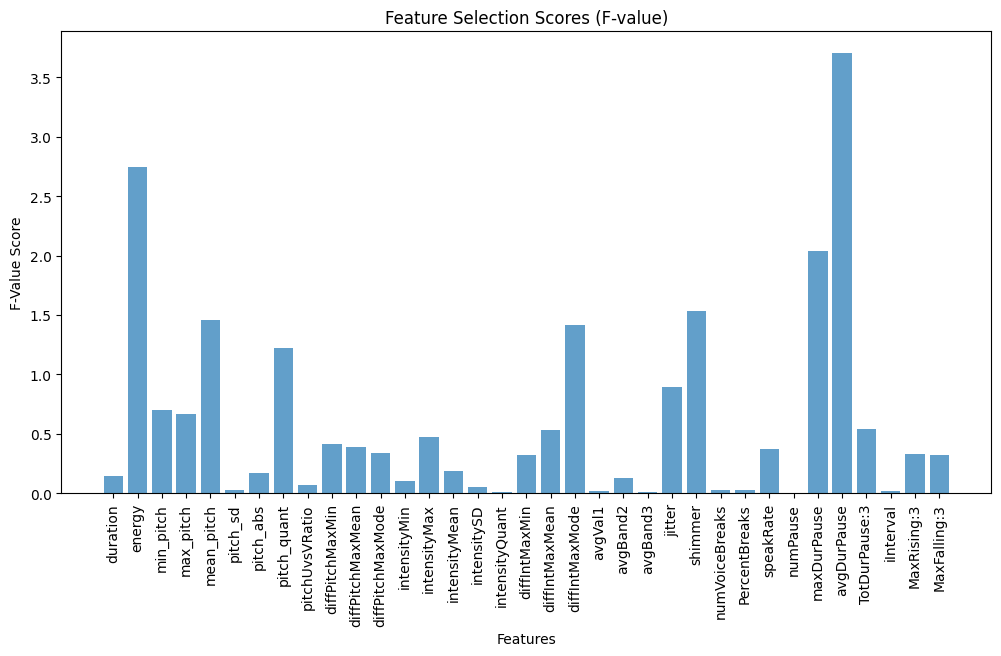

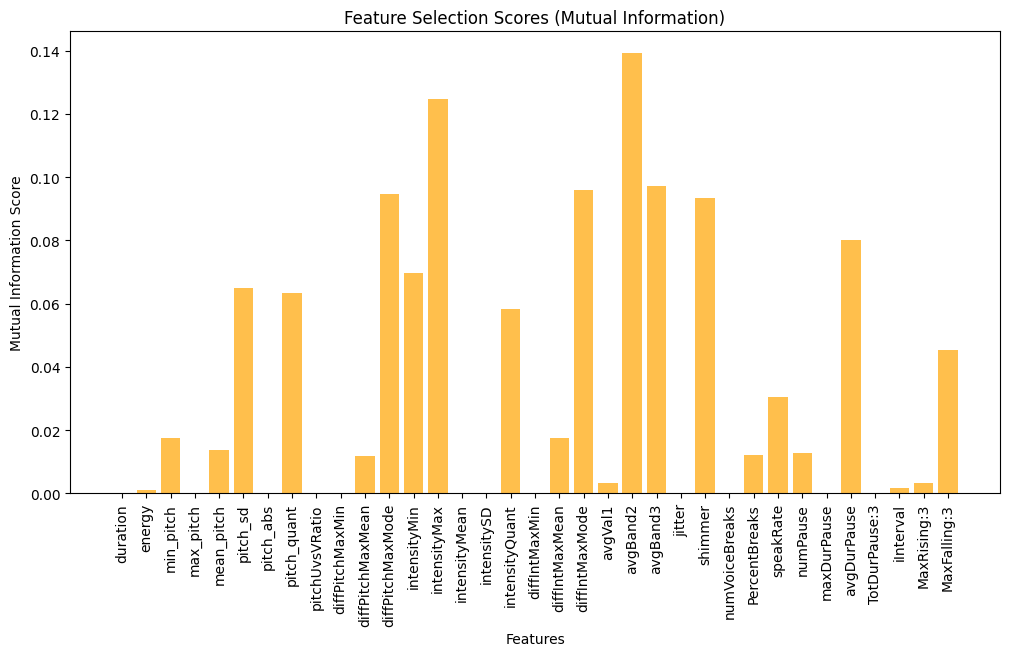

In [ ]:
# F-value scores
f_scores = selector.scores_

# Visualize F-value scores
plt.figure(figsize=(12, 6))
plt.bar(prosodic_features.columns, f_scores, alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-Value Score')
plt.title('Feature Selection Scores (F-value)')
plt.show()

# Mutual Information Scores (Optional)
mi_scores = mi_selector.scores_
plt.figure(figsize=(12, 6))
plt.bar(prosodic_features.columns, mi_scores, alpha=0.7, color='orange')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Feature Selection Scores (Mutual Information)')
plt.show()


In [ ]:
# Intersection of selected features
intersection_features = set(selected_features).intersection(mi_selected_features)
print("Common features:", list(intersection_features))


Common features: ['diffIntMaxMode', 'shimmer', 'pitch_quant', 'avgDurPause']


In [ ]:
# Union of selected features
union_features = set(selected_features).union(mi_selected_features)
print("Hybrid feature set:", list(union_features))


Hybrid feature set: ['pitch_quant', 'intensityMax', 'avgDurPause', 'diffIntMaxMode', 'pitch_sd', 'avgBand2', 'energy', 'diffPitchMaxMode', 'shimmer', 'maxDurPause', 'mean_pitch', 'intensityMin', 'min_pitch', 'max_pitch', 'jitter', 'avgBand3']


In [ ]:
transcript__prosodic.head()

,Participant,transcript,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,...,numVoiceBreaks,PercentBreaks,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3
0,p1,interviewer: so how are you doing?|interviewee...,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,...,86.40,0.432938,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474
1,p10,interviewer: so how you doing?|interviewee: g...,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,...,149.40,0.411714,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450
2,p11,interviewer: so tell me about yourself. |inte...,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,...,120.80,0.367116,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714
3,p12,interviewer: so how are you doing today?|inter...,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,...,92.20,0.397498,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378
4,p13,interviewer: how are you doing today?|intervie...,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,...,96.25,0.490740,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950


In [ ]:
prosodic_scores = pd.merge(prosodic_grouped, scores_data, on='Participant')
prosodic_scores.head()

,Participant,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,Overall,Excited
0,p1,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,0.951904,...,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474,5.297316,5.043890
1,p10,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,0.825242,...,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450,4.725115,4.383947
2,p11,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,0.628611,...,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714,5.010430,4.297760
3,p12,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,0.804380,...,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378,5.038526,5.322526
4,p13,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,1.132642,...,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950,4.251251,3.579510


In [ ]:
prosodic_scores.shape

(138, 38)

In [ ]:
feature_sets = {
    "FS1": prosodic_scores[selected_features],
    "FS2": prosodic_scores[mi_selected_features],
    "FS3": prosodic_scores[list(intersection_features)],
    "FS4": prosodic_scores[list(union_features)],
}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr

# Placeholder for results
results = {}

for feature_set_name, features in feature_sets.items():
    results[feature_set_name] = {}
    X = features
    y_overall = scores_data['Overall']
    y_excited = scores_data['Excited']

    for fold in range(num_folds):
        # Split data
        train_set, val_set, test_set = get_data_splits(prosodic_scores, fold)

        # Extract features and targets
        X_train = train_set[features.columns]
        y_train_overall = train_set['Overall']
        y_train_excited = train_set['Excited']
        X_test = test_set[features.columns]
        y_test_overall = test_set['Overall']
        y_test_excited = test_set['Excited']

        # RF Model
        rf = RandomForestRegressor()
        rf.fit(X_train, y_train_overall)
        y_pred_overall = rf.predict(X_test)

        # Pearson's r and RE for Overall
        r_overall, _ = pearsonr(y_test_overall, y_pred_overall)
        re_overall = np.mean(np.abs((y_test_overall - y_pred_overall) / y_test_overall))

        # Store results
        results[feature_set_name]['RandomForest'] = {
            "Pearson_r_Overall": r_overall,
            "RE_Overall": re_overall,
        }



In [ ]:
results

{'FS1': {'RandomForest': {'Pearson_r_Overall': 0.6724924568706995,
   'RE_Overall': 0.09474978158268726}},
 'FS2': {'RandomForest': {'Pearson_r_Overall': 0.39670168860730093,
   'RE_Overall': 0.10841500829554086}},
 'FS3': {'RandomForest': {'Pearson_r_Overall': 0.2971725672970747,
   'RE_Overall': 0.10268719608320402}},
 'FS4': {'RandomForest': {'Pearson_r_Overall': 0.695650069811103,
   'RE_Overall': 0.09225702962947566}}}

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model(input_dim):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_dim=input_dim),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='linear')  # Regression output
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae',pearson_correlation])
    return model


In [ ]:
import tensorflow.keras.backend as K

def pearson_correlation(y_true, y_pred):
    x = y_true - K.mean(y_true)
    y = y_pred - K.mean(y_pred)
    r = K.sum(x * y) / (K.sqrt(K.sum(K.square(x))) * K.sqrt(K.sum(K.square(y))))
    return r


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import numpy as np


for feature_set_name, features in feature_sets.items():
    results[feature_set_name] = {}
    X = features
    y_overall = scores_data['Overall']
    y_excited = scores_data['Excited']

    fold_metrics = []

    for fold in range(num_folds):
        # Split data
        train_set, val_set, test_set = get_data_splits(prosodic_scores, fold)

        X_train = train_set[features.columns]
        y_train_overall = train_set['Overall']
        X_val = val_set[features.columns]
        y_val_overall = val_set['Overall']
        X_test = test_set[features.columns]
        y_test_overall = test_set['Overall']

        # Build and train the model
        model = build_model(input_dim=X_train.shape[1])
        history = model.fit(
            X_train, y_train_overall,
            validation_data=(X_val, y_val_overall),
            epochs=50,
            batch_size=16,
            verbose=0
        )

        # Evaluate on the test set
        y_pred_overall = model.predict(X_test).flatten()
        r_overall, _ = pearsonr(y_test_overall, y_pred_overall)
        re_overall = np.mean(np.abs((y_test_overall - y_pred_overall) / y_test_overall))

        fold_metrics.append({"Pearson_r_Overall": r_overall,
            "RE_Overall": re_overall})

    # Average across folds
    avg_r = np.mean([m['Pearson_r_Overall'] for m in fold_metrics])
    avg_re = np.mean([m['RE_Overall'] for m in fold_metrics])
    results[feature_set_name]['NeuralNetwork'] = {
        'Pearson_r_Overall': avg_r,
        'RE_Overall': avg_re,
    }


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [ ]:
results

{'FS1': {'NeuralNetwork': {'Pearson_r_Overall': -0.008120353309425366,
   'RE_Overall': 0.34642067483002503}},
 'FS2': {'NeuralNetwork': {'Pearson_r_Overall': -0.06901076304494708,
   'RE_Overall': 0.6148892568162345}},
 'FS3': {'NeuralNetwork': {'Pearson_r_Overall': 0.07217212701439787,
   'RE_Overall': 0.3958671189194731}},
 'FS4': {'NeuralNetwork': {'Pearson_r_Overall': 0.1276884307815803,
   'RE_Overall': 0.39496690530175016}}}

In [ ]:
word_count.shape

(138, 2464)

In [ ]:
prosodic_data[selected_features].shape

(668, 10)

,Participant,transcript,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,...,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,Overall,Excited
0,p1,interviewer: so how are you doing?|interviewee...,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,...,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474,5.297316,5.043890
1,p10,interviewer: so how you doing?|interviewee: g...,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,...,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450,4.725115,4.383947
2,p11,interviewer: so tell me about yourself. |inte...,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,...,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714,5.010430,4.297760
3,p12,interviewer: so how are you doing today?|inter...,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,...,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378,5.038526,5.322526
4,p13,interviewer: how are you doing today?|intervie...,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,...,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950,4.251251,3.579510


In [ ]:
# Combine features
standardScaler = StandardScaler()
prosodic_scores_scaled = standardScaler.fit_transform(transcript_prosodic_scores[selected_features])
combined_features = np.hstack((word_count, prosodic_scores_scaled))
print(f"Combined Feature Set Shape: {combined_features.shape}")

Combined Feature Set Shape: (138, 2474)


In [ ]:
transcript_prosodic_scores.shape

(138, 39)

In [ ]:
word_count.shape

(138, 2464)

In [ ]:
combined_features_df = pd.DataFrame(combined_features)
combined_features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.047489,0.750142,-0.856108,-0.936050,-0.877185,-0.105654,-0.156782,-0.001166,-0.513822,-0.835859
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.425751,0.095134,-0.666748,-1.329626,-1.206591,0.190546,-1.095165,-0.923622,-0.352543,0.305541
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.145987,-0.141196,0.663551,0.441103,0.457770,-1.125421,-1.141468,-1.000669,0.068598,-0.827536
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.127965,-0.121040,-1.351270,0.308297,0.464019,0.720691,-0.953259,-1.515764,1.423214,1.829785
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.285916,0.337341,-0.753008,0.295805,0.568654,-1.043417,-0.344825,-0.253017,-0.322701,0.024947


In [ ]:
prosodic_grouped.head()

,Participant,duration,energy,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,numVoiceBreaks,PercentBreaks,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3
0,p1,34.186796,0.011510,78.064294,340.516454,129.307639,25.242104,176.176383,121.943026,0.951904,...,86.40,0.432938,0.000747,35.00,2.312533,0.5312,17.99840,87.8,211.4666,186.2474
1,p10,77.378613,0.032118,74.787772,345.935347,112.955696,25.915806,166.265804,106.681483,0.825242,...,149.40,0.411714,0.000294,58.00,2.502400,0.7232,39.85480,159.8,231.7972,222.0450
2,p11,50.431333,0.007220,73.605587,384.004524,186.524402,35.911648,226.353579,183.792011,0.628611,...,120.80,0.367116,0.000360,47.40,2.998190,0.5326,25.75300,127.8,176.2874,203.0714
3,p12,35.910442,0.008005,73.706414,326.346399,181.006693,40.494458,266.110211,184.081501,0.804380,...,92.20,0.397498,0.000573,24.00,4.592919,0.9796,24.36940,94.8,152.8112,148.5378
4,p13,41.207740,0.001127,75.999356,343.466869,180.487662,41.448296,249.834109,188.929281,1.132642,...,96.25,0.490740,0.000552,30.25,2.537531,0.6760,18.99175,99.0,191.4710,171.0950


In [ ]:
transcript_data.head()

,Participant,transcript
0,p1,interviewer: so how are you doing?|interviewee...
1,p10,interviewer: so how you doing?|interviewee: g...
2,p11,interviewer: so tell me about yourself. |inte...
3,p12,interviewer: so how are you doing today?|inter...
4,p13,interviewer: how are you doing today?|intervie...


In [ ]:
transcript_prosodic_scores['Overall']

,Overall
0,5.297316
1,4.725115
2,5.010430
3,5.038526
4,4.251251
...,...
133,6.045748
134,5.710073
135,5.626074
136,4.853881


In [ ]:
combined_features_scores = pd.concat([transcript_prosodic_scores['Participant'], combined_features_df, transcript_prosodic_scores['Overall'], transcript_prosodic_scores['Excited']], axis=1)

combined_features_scores.columns = combined_features_scores.columns.astype(str)

In [ ]:
combined_features_scores.head()

,Participant,0,1,2,3,4,5,6,7,8,...,2466,2467,2468,2469,2470,2471,2472,2473,Overall,Excited
0,p1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.856108,-0.936050,-0.877185,-0.105654,-0.156782,-0.001166,-0.513822,-0.835859,5.297316,5.043890
1,p10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.666748,-1.329626,-1.206591,0.190546,-1.095165,-0.923622,-0.352543,0.305541,4.725115,4.383947
2,p11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.663551,0.441103,0.457770,-1.125421,-1.141468,-1.000669,0.068598,-0.827536,5.010430,4.297760
3,p12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.351270,0.308297,0.464019,0.720691,-0.953259,-1.515764,1.423214,1.829785,5.038526,5.322526
4,p13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.753008,0.295805,0.568654,-1.043417,-0.344825,-0.253017,-0.322701,0.024947,4.251251,3.579510


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr


results = {}

# for feature_set_name, features in feature_sets.items():
#     results[feature_set_name] = {}
X = features
y_overall = combined_features_scores['Overall']
y_excited = combined_features_scores['Excited']

for fold in range(num_folds):
    # Split data
    train_set, val_set, test_set = get_data_splits(combined_features_scores, fold)

    # Extract features and targets
    X_train = train_set.drop(columns=['Excited', 'Overall','Participant'])
    y_train_overall = train_set['Overall']
    y_train_excited = train_set['Excited']
    X_test = test_set.drop(columns=['Excited', 'Overall','Participant'])
    y_test_overall = test_set['Overall']
    y_test_excited = test_set['Excited']

    # Tree-Based Model
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train_overall)
    y_pred_overall = rf.predict(X_test)

    # Pearson's r and RE for Overall
    r_overall, _ = pearsonr(y_test_overall, y_pred_overall)
    re_overall = np.mean(np.abs((y_test_overall - y_pred_overall) / y_test_overall))

    # ore results
    results[feature_set_name]['RandomForest'] = {
        "Pearson_r_Overall": r_overall,
        "RE_Overall": re_overall,
    }



In [ ]:
results

{'FS1': {'NeuralNetwork': {'Pearson_r_Overall': -0.008120353309425366,
   'RE_Overall': 0.34642067483002503}},
 'FS2': {'NeuralNetwork': {'Pearson_r_Overall': -0.06901076304494708,
   'RE_Overall': 0.6148892568162345}},
 'FS3': {'NeuralNetwork': {'Pearson_r_Overall': 0.07217212701439787,
   'RE_Overall': 0.3958671189194731}},
 'FS4': {'NeuralNetwork': {'Pearson_r_Overall': 0.1276884307815803,
   'RE_Overall': 0.39496690530175016},
  'RandomForest': {'Pearson_r_Overall': 0.7466755771020278,
   'RE_Overall': 0.10032923120429614}}}

In [ ]:
word_count

,000,10,100,13,14,15,16,18,20,200,...,yep,yes,yo,yoga,york,young,younger,youngest,yup,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
135,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
